# Name: Syed Saad Ali
# Task: Prediction Using Supervised ML
# Problem Statement:  Predict the percentage of an student based on number of study hours.



In [1]:
# importing required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#reading data   

student_data = pd.read_csv("http://bit.ly/w-data")
print("Successfully imported")
display(student_data)

Successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


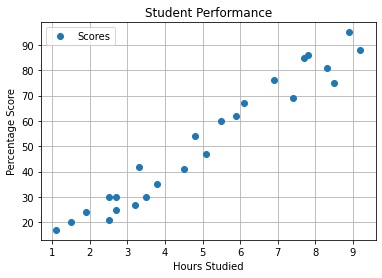

In [3]:
# Plotting the data to see relationship between the data

student_data.plot(x='Hours', y='Scores',style='o')  
plt.title('Student Performance')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid(True)
plt.show()
# we can see that percentage scored is directly proportional to hours studied

In [4]:
#Preparing the data
#Here we are dividing data into inputs and outputs

X = student_data.iloc[:, :-1].values  
Y = student_data.iloc[:, 1].values

In [5]:
# Splitting data into training set and test set

from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [6]:
# Training the algorithm using linear regression method

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training completed.")

Training completed.


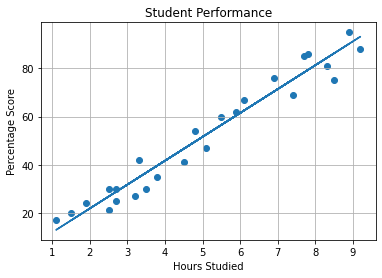

In [7]:
# Plotting regression line 
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.title('Student Performance')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid(True)
plt.show()
# It is perfectly fitting, no problem of underfitting or overfitting

In [8]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


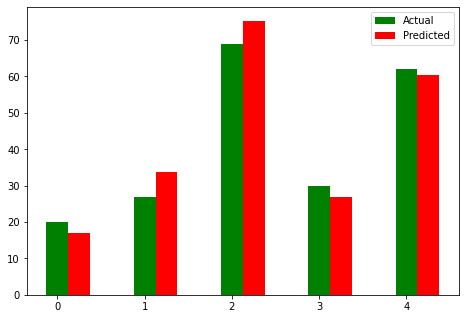

In [9]:
# Comparing Actual vs Predicted Scores

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 
display(df)
data=[Y_test,Y_pred]
Z=np.arange(5)
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Z + 0.00, data[0], color = 'g', width = 0.25)
ax.bar(Z + 0.25, data[1], color = 'r', width = 0.25)
ax.legend(labels=['Actual', 'Predicted'])
plt.show()


In [13]:
# Testing with our own data
# What will be predicted score if a student studies for 9.25 hrs/ day?

hours = np.array([[9.25]])
ScorePred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(ScorePred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [17]:
# Evaluating the model
# Evaluting performance of algorithm based on some matics

from sklearn import metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 

# r^2 Score Error
print("r^2 Score Error: ",r2_score(Y_test,regressor.predict(X_test)))

# Mean Squared Error
print("Mean Squared Error: ",mean_squared_error(Y_test,regressor.predict(X_test)))
      



Mean Absolute Error: 4.183859899002975
r^2 Score Error:  0.9454906892105356
Mean Squared Error:  21.5987693072174
